In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def scatter3d(data, ncols=4, nrows=4, s=1, alpha=0.1, azim_elev_title=True, **kwargs):
    assert data.shape[-1] == 3, "data must have three axes. No more, no less."
    if data.ndim > 2:
        data = data.reshape(-1, 3)
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, subplot_kw={"projection": "3d"}, **kwargs)
    num_plots = ncols * nrows
    azims = np.linspace(0, 180, ncols + 1)[:-1]
    elevs = np.linspace(0, 90, nrows + 1)[:-1]
    view_angles = np.stack(np.meshgrid(azims, elevs), axis=-1).reshape(-1, 2)
    for i, ax in enumerate(axs.flat):
        ax.scatter(xs=data[:, 0], ys=data[:, 1], zs=data[:, 2], s=s, alpha=alpha)
        ax.azim = view_angles[i, 0]
        ax.elev = view_angles[i, 1]
        ax.axis("off")
        if azim_elev_title:
            ax.set_title(f"azim={ax.azim}, elev={ax.elev}")
    return fig, axs


In [3]:
def torus_coordinates(x, y, r1=1, r2=2, alpha = 0):
    xt = (r2 + r1*np.cos(y-alpha*x))*np.cos(x)
    yt = (r2 + r1*np.cos(y-alpha*x))*np.sin(x)
    zt = -r1*np.sin(y-alpha*x)
    return xt, yt, zt

def sheet_coordinates_twisted_torus(xt, yt, zt, r1, r2, alpha):
    u = np.arcsin(zt/r1)
    theta = np.arctan2(yt, xt)
    phi = alpha*theta-u
    # take special care when theta = +- pi/2
    phi = np.where(xt == 0, alpha*np.sign(yt)*np.pi/2-u , phi)
    theta = np.where(xt == 0, np.sign(yt)*np.pi/2, theta)
    return phi, theta

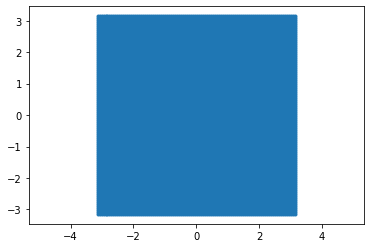

In [4]:
n = 100
line = np.linspace(-np.pi,np.pi, n)
xx, yy = np.meshgrid(line,line)

uu = np.stack((np.ravel(xx), np.ravel(yy)), axis=-1)
plt.plot(uu[:,0], uu[:,1], ".")
plt.axis("equal")
plt.show()

# set torus parameters
r1 = 0.9
r2 = 1
alpha = 0.0


In [5]:
xt, yt, zt = torus_coordinates(xx, yy, r1, r2, alpha)

In [6]:
ut = np.stack((xt,yt,zt), axis = -1)

(<Figure size 720x720 with 9 Axes>,
 array([[<Axes3DSubplot:title={'center':'azim=0.0, elev=0.0'}>,
         <Axes3DSubplot:title={'center':'azim=60.0, elev=0.0'}>,
         <Axes3DSubplot:title={'center':'azim=120.0, elev=0.0'}>],
        [<Axes3DSubplot:title={'center':'azim=0.0, elev=30.0'}>,
         <Axes3DSubplot:title={'center':'azim=60.0, elev=30.0'}>,
         <Axes3DSubplot:title={'center':'azim=120.0, elev=30.0'}>],
        [<Axes3DSubplot:title={'center':'azim=0.0, elev=60.0'}>,
         <Axes3DSubplot:title={'center':'azim=60.0, elev=60.0'}>,
         <Axes3DSubplot:title={'center':'azim=120.0, elev=60.0'}>]],
       dtype=object))

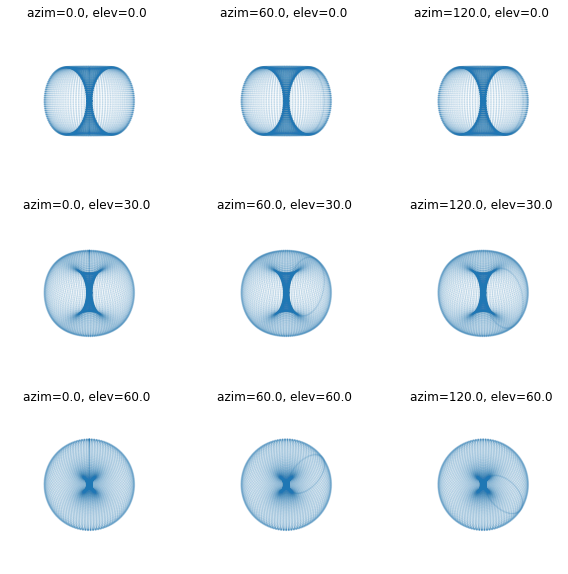

In [7]:
scatter3d(ut, ncols = 3, nrows = 3, figsize = (10,10))

In [8]:
x, y = sheet_coordinates_twisted_torus(xt, yt, zt, r1 = r1, r2= r2, alpha = alpha)

In [9]:
x.shape, y.shape

((100, 100), (100, 100))

In [10]:
r = np.stack((np.ravel(x),np.ravel(y)), axis = -1)

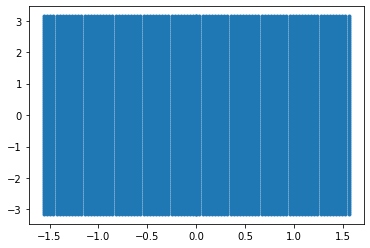

In [11]:
plt.plot(r[:,0], r[:,1], ".")